### Codio Activity 9.1: Sequential Feature Selection 

This activity focuses on using the stepwise feature selection approach outlined in video 9.3.  Here, your goal is to first generate polynomial features for a `degree = 3` model and limit them to a set number using the `SequentialFeatureSelection`. For more information on the selector see [here](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection). 

In [1]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Data

The [Medical Cost Personal dataset](https://www.kaggle.com/mirichoi0218/insurance) used in this assignment is from kaggle  and contains information on insurance clients and their medical costs billed by the insurance company.  You will build regression models to predict the logarithm of the `charges` column. The dataset is loaded and displayed below, and the original target is plotted next to its resulting logarithm.   

In [2]:
insurance = pd.read_csv('codio_9_1_solution/data/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Logarithm of Insurance Price')

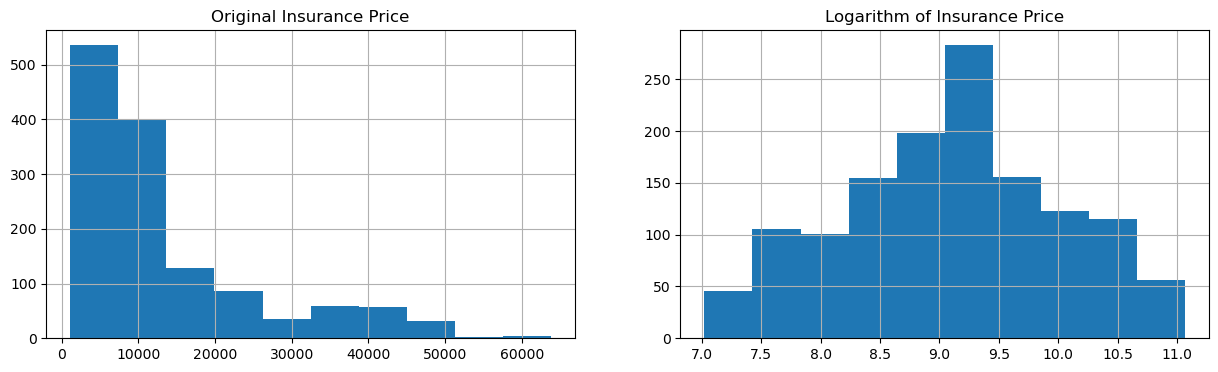

In [5]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
ax[0].hist(insurance['charges'])
ax[0].grid()
ax[0].set_title('Original Insurance Price')
ax[1].hist(np.log1p(insurance['charges']))
ax[1].grid()
ax[1].set_title('Logarithm of Insurance Price')

### Problem 1

#### Train/Test split

Create a train and test set using `train_test_split` and assign to `X_train`, `X_test`, `y_train`, `y_test` below with parameters:

- `test_size = 0.3`
- `random_state = 42`

For the feaures, use all the column inside the `insurance` DataFrame except for the `charges` one. The target data (`insurance.charges`) should be transformed using to the `np.log1p` function.  

In [6]:
X_train,X_test,y_train,y_test = train_test_split(insurance.drop('charges', axis = 1),np.log1p(insurance['charges']),random_state = 42, test_size = 0.3 )

In [7]:
X_train

,age,sex,bmi,children,smoker,region
332,61,female,31.160,0,no,northwest
355,46,male,27.600,0,no,southwest
138,54,female,31.900,3,no,southeast
381,55,male,30.685,0,yes,northeast
292,25,male,45.540,2,yes,southeast
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


### Problem 2

#### Building `PolynomialFeatures`

To begin, create a `DataFrame` with the `degree = 3` features and interaction terms added for numeric columns. Assign the following objects to the variables:

- Instantiate a `PolynomialFeatures` object for cubic features. Inside this function, set `include_bias=False`. Assign this result to `poly_features`.
- Use the `fit_transform` function on `poly_features` to fit and transformed the features using `['age', 'bmi', 'children']`.  Assign this result to `X_train_poly`.
- Use the `fit_transform` function on `poly_features` to fit and transformed the test data using `['age', 'bmi', 'children']`.  Assign this result to `X_test_poly`.
- Use the `get_feature_names_out` function on `poly_features` to extract the column names. Assign this result to `columns`.
- Create a  DataFrame with the `X_train_poly` data and column names equal to `column`. Assign this result to `train_df`.
- Create a  DataFrame with the `X_test_poly` data and column names equal to `column`. Assign this result to `test_df`.

The DataFrame `train_df` should look like:

In [8]:
poly_feature = PolynomialFeatures(include_bias = False, degree = 3)

In [9]:
X_train_poly = poly_feature.fit_transform(X_train[['age','bmi','children']])
X_train_poly

array([[6.10000e+01, 3.11600e+01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.60000e+01, 2.76000e+01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.40000e+01, 3.19000e+01, 3.00000e+00, ..., 3.05283e+03,
        2.87100e+02, 2.70000e+01],
       ...,
       [5.80000e+01, 2.51750e+01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.70000e+01, 4.76000e+01, 2.00000e+00, ..., 4.53152e+03,
        1.90400e+02, 8.00000e+00],
       [5.50000e+01, 2.99000e+01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]], shape=(936, 19))

In [10]:
X_test_poly = poly_feature.fit_transform(X_test[['age','bmi','children']])
X_test_poly

array([[4.50000000e+01, 2.51750000e+01, 2.00000000e+00, ...,
        1.26756125e+03, 1.00700000e+02, 8.00000000e+00],
       [3.60000000e+01, 3.00200000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.40000000e+01, 2.68850000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.80000000e+01, 2.82150000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.80000000e+01, 3.60800000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 2.20000000e+01, 1.00000000e+00, ...,
        4.84000000e+02, 2.20000000e+01, 1.00000000e+00]], shape=(402, 19))

In [11]:
columns = poly_feature.get_feature_names_out()
columns

array(['age', 'bmi', 'children', 'age^2', 'age bmi', 'age children',
       'bmi^2', 'bmi children', 'children^2', 'age^3', 'age^2 bmi',
       'age^2 children', 'age bmi^2', 'age bmi children',
       'age children^2', 'bmi^3', 'bmi^2 children', 'bmi children^2',
       'children^3'], dtype=object)

In [12]:
train_df = pd.DataFrame(X_train_poly, columns = columns)
train_df

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3
0,61.0,31.160,0.0,3721.0,1900.760,0.0,970.945600,0.00,0.0,226981.0,115946.360,0.0,59227.681600,0.00,0.0,30254.664896,0.0000,0.00,0.0
1,46.0,27.600,0.0,2116.0,1269.600,0.0,761.760000,0.00,0.0,97336.0,58401.600,0.0,35040.960000,0.00,0.0,21024.576000,0.0000,0.00,0.0
2,54.0,31.900,3.0,2916.0,1722.600,162.0,1017.610000,95.70,9.0,157464.0,93020.400,8748.0,54950.940000,5167.80,486.0,32461.759000,3052.8300,287.10,27.0
3,55.0,30.685,0.0,3025.0,1687.675,0.0,941.569225,0.00,0.0,166375.0,92822.125,0.0,51786.307375,0.00,0.0,28892.051669,0.0000,0.00,0.0
4,25.0,45.540,2.0,625.0,1138.500,50.0,2073.891600,91.08,4.0,15625.0,28462.500,1250.0,51847.290000,2277.00,100.0,94445.023464,4147.7832,182.16,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,18.0,31.350,4.0,324.0,564.300,72.0,982.822500,125.40,16.0,5832.0,10157.400,1296.0,17690.805000,2257.20,288.0,30811.485375,3931.2900,501.60,64.0
932,39.0,23.870,5.0,1521.0,930.930,195.0,569.776900,119.35,25.0,59319.0,36306.270,7605.0,22221.299100,4654.65,975.0,13600.574603,2848.8845,596.75,125.0
933,58.0,25.175,0.0,3364.0,1460.150,0.0,633.780625,0.00,0.0,195112.0,84688.700,0.0,36759.276250,0.00,0.0,15955.427234,0.0000,0.00,0.0
934,37.0,47.600,2.0,1369.0,1761.200,74.0,2265.760000,95.20,4.0,50653.0,65164.400,2738.0,83833.120000,3522.40,148.0,107850.176000,4531.5200,190.40,8.0


In [13]:
test_df = pd.DataFrame(X_test_poly, columns = columns)
test_df

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3
0,45.0,25.175,2.0,2025.0,1132.875,90.0,633.780625,50.350,4.0,91125.0,50979.375,4050.0,28520.128125,2265.75,180.0,15955.427234,1267.561250,100.700,8.0
1,36.0,30.020,0.0,1296.0,1080.720,0.0,901.200400,0.000,0.0,46656.0,38905.920,0.0,32443.214400,0.00,0.0,27054.036008,0.000000,0.000,0.0
2,64.0,26.885,0.0,4096.0,1720.640,0.0,722.803225,0.000,0.0,262144.0,110120.960,0.0,46259.406400,0.00,0.0,19432.564704,0.000000,0.000,0.0
3,46.0,25.745,3.0,2116.0,1184.270,138.0,662.805025,77.235,9.0,97336.0,54476.420,6348.0,30489.031150,3552.81,414.0,17063.915369,1988.415075,231.705,27.0
4,19.0,31.920,0.0,361.0,606.480,0.0,1018.886400,0.000,0.0,6859.0,11523.120,0.0,19358.841600,0.00,0.0,32522.853888,0.000000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,50.0,44.745,0.0,2500.0,2237.250,0.0,2002.115025,0.000,0.0,125000.0,111862.500,0.0,100105.751250,0.00,0.0,89584.636794,0.000000,0.000,0.0
398,36.0,29.700,0.0,1296.0,1069.200,0.0,882.090000,0.000,0.0,46656.0,38491.200,0.0,31755.240000,0.00,0.0,26198.073000,0.000000,0.000,0.0
399,18.0,28.215,0.0,324.0,507.870,0.0,796.086225,0.000,0.0,5832.0,9141.660,0.0,14329.552050,0.00,0.0,22461.572838,0.000000,0.000,0.0
400,58.0,36.080,0.0,3364.0,2092.640,0.0,1301.766400,0.000,0.0,195112.0,121373.120,0.0,75502.451200,0.00,0.0,46967.731712,0.000000,0.000,0.0


### Problem 3

#### Using `SequentialFeatureSelector`

Use the `SequentialFeatureSelector` function with a `LinearRegression` estimator to select three features (`n_features_to_select = 3`). Assign this result to `selector`.

Use the `fit_transform` function on `selector` to train the model on `train_df` and `y_train`. Assign this result to `best_features`.

Finally, assign your transformed features `best_features` to a DataFrame. The columns of this DataFrame will be equal to `selector.get_feature_names_out()`.  Assigned the result to `best_features_df` as an array.

In [14]:
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select = 3)
selector

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3)

In [15]:
best_features = selector.fit_transform(train_df, y_train)
best_features

array([[ 61. ,   0. ,   0. ],
       [ 46. ,   0. ,   0. ],
       [ 54. ,  95.7, 486. ],
       ...,
       [ 58. ,   0. ,   0. ],
       [ 37. ,  95.2, 148. ],
       [ 55. ,   0. ,   0. ]], shape=(936, 3))

In [16]:
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
best_features_df

,age,bmi children,age children^2
0,61.0,0.00,0.0
1,46.0,0.00,0.0
2,54.0,95.70,486.0
3,55.0,0.00,0.0
4,25.0,91.08,100.0
...,...,...,...
931,18.0,125.40,288.0
932,39.0,119.35,975.0
933,58.0,0.00,0.0
934,37.0,95.20,148.0


### Problem 4

#### `Pipeline` for regression model

Complete the code below according to the instructions below:

- Create a `Pipeline` object with steps `column_selector` to select three features, and `linreg` to build a `LinearRegression` estimator. Assign this resul to `pipe`.
- Use the `fit` function to train your pipeline using `train_df` and `y_train`.
- Use the `predict` function to calculate the predicitons on `train_df`. Assign the result on `train_preds`.
- Use the `predict` function to calculate the predicitons on `test_df`. Assign the result on `test_preds`.
- Use the `mean_squared_error` function to calculate the MSE between `y_train` and `train_preds`. Assign your result to `train_mse`.
- Use the `mean_squared_error` function to calculate the MSE between `y_test` and `test_preds`. Assign your result to `test_mse`.


In [17]:
pipe = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])
pipe.fit(train_df, y_train)
train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

Train MSE:  0.60
Test MSE:  0.56


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

#### Problem 5

#### Backward Selction

Similar to the forward selection method, backward selection starts with all features and sequentially eliminates features until the threshold is achieved. 

Repeat the steps on Problem 4, but now use the selector `backward_selector` below to again build a pipeline named `backward_pipe` and fit a `LinearRegression` model using three features from `train_df`. 

Assign the train and test mean squared errors as `backward_train_mse` and `backward_test_mse` respectively.

In [18]:
backward_selector = SequentialFeatureSelector(LinearRegression(), 
                                              n_features_to_select=3,
                                              direction = 'backward')

In [19]:
backward_pipe = Pipeline([('column_selector', backward_selector),
                ('linreg', LinearRegression())])
backward_pipe.fit(train_df, y_train)
train_preds = backward_pipe.predict(train_df)
test_preds = backward_pipe.predict(test_df)
backward_train_mse = mean_squared_error(y_train, train_preds)
backward_test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {backward_train_mse: .2f}')
print(f'Test MSE: {backward_test_mse: .2f}')
backward_pipe

Train MSE:  0.60
Test MSE:  0.57


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

#### Further Exploration

As an optional exercise work on incorporating the `PolynomialFeatures` into the pipeline along with a `TransformedTargetRegressor` to further abstract the modeling process.  

### Codio Activity 9.2: Cross-Validation with `SequentialFeatureSelector`

**Expected Time: 45 Minutes**

**Total Points: 60**

This activity uses the same example as in Video 9.3. That example uses the `shuffle` and `np.split` functions to create the train/test split indices. Then, these indices are passed to the `cv` argument in the `SequentialFeatureSelector`. Here, rather than using a Pipeline you are to conduct the transformations by hand, and feed the resulting selected features into a `LinearRegression` estimator.


#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import shuffle, seed

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

### The Dataset

For this exercise, the built-in diabetes dataset will be used.  The features are blood measurements and demographic information, and the target is a numeric measurement of diabetes progression.  The data is loaded and displayed below.  

In [20]:
# if as_frame = False, then later diabetes.frame shows nothing, diabetes.data is numpy array
diabetes = load_diabetes(as_frame = True)

In [14]:
#Bunch is dictionary's child
type(diabetes)

sklearn.utils._bunch.Bunch

In [15]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [8]:
diabetes.DESCR


'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [16]:
diabetes.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [19]:
diabetes_frame_false = load_diabetes(as_frame = False)
diabetes_frame_false.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [21]:
df = diabetes['frame']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
display(type(diabetes))
isinstance(diabetes, dict)

sklearn.utils._bunch.Bunch

True

In [24]:
# def frame(self):
#.    return dict[keys]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### Problem 1

#### Create a list of indicies and shuffle them

To begin, create a list of the indices of the DataFrame `df`.  Assign this list to `all_indices`.  Then, use the `shuffle` function to shuffle the list in place.  In order to be consistent, set a `seed(42)` before calling the `shuffle` function.  

In [26]:
all_indices = list(range(0,len(df)))
all_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [27]:
seed(42)
shuffle(all_indices)
all_indices

[170,
 226,
 231,
 345,
 337,
 106,
 199,
 300,
 374,
 163,
 162,
 94,
 41,
 263,
 291,
 160,
 318,
 11,
 139,
 190,
 4,
 315,
 158,
 34,
 37,
 215,
 387,
 69,
 207,
 355,
 92,
 221,
 433,
 269,
 145,
 2,
 395,
 77,
 431,
 265,
 313,
 324,
 408,
 59,
 336,
 389,
 173,
 21,
 45,
 164,
 109,
 208,
 211,
 89,
 169,
 310,
 6,
 61,
 320,
 177,
 303,
 143,
 277,
 391,
 276,
 153,
 88,
 218,
 20,
 351,
 394,
 422,
 180,
 428,
 96,
 93,
 257,
 175,
 68,
 187,
 130,
 149,
 356,
 348,
 217,
 268,
 233,
 212,
 38,
 347,
 198,
 225,
 50,
 144,
 409,
 100,
 281,
 85,
 26,
 200,
 127,
 66,
 340,
 363,
 209,
 53,
 151,
 244,
 249,
 184,
 74,
 31,
 72,
 133,
 314,
 228,
 188,
 240,
 120,
 76,
 210,
 156,
 411,
 10,
 380,
 129,
 7,
 261,
 296,
 264,
 159,
 375,
 286,
 368,
 14,
 55,
 75,
 238,
 39,
 278,
 358,
 323,
 369,
 251,
 99,
 272,
 97,
 154,
 178,
 344,
 353,
 262,
 203,
 254,
 419,
 206,
 371,
 406,
 201,
 439,
 179,
 253,
 113,
 19,
 329,
 118,
 333,
 307,
 241,
 420,
 435,
 414,
 192,
 392,


### Problem 2

#### Split indices to train and test values

Use the `np.split` function to split the `all_indices` data based on the first 350 values.  Assign these as arrays to `train_idx` and `test_idx` below.  

In [28]:
train_idx,test_idx = np.split(all_indices, [350])
print(train_idx)

[170 226 231 345 337 106 199 300 374 163 162  94  41 263 291 160 318  11
 139 190   4 315 158  34  37 215 387  69 207 355  92 221 433 269 145   2
 395  77 431 265 313 324 408  59 336 389 173  21  45 164 109 208 211  89
 169 310   6  61 320 177 303 143 277 391 276 153  88 218  20 351 394 422
 180 428  96  93 257 175  68 187 130 149 356 348 217 268 233 212  38 347
 198 225  50 144 409 100 281  85  26 200 127  66 340 363 209  53 151 244
 249 184  74  31  72 133 314 228 188 240 120  76 210 156 411  10 380 129
   7 261 296 264 159 375 286 368  14  55  75 238  39 278 358 323 369 251
  99 272  97 154 178 344 353 262 203 254 419 206 371 406 201 439 179 253
 113  19 329 118 333 307 241 420 435 414 192 392 227  27 224 103 213  25
 297 167 396 418 415 105 247  90 398 168 292 306  48 104 196  62 121 147
 146 266 352 326 245 124 385 378  60 131 427  84   8  17 220 424 328 403
  18 284 305 319 293 141 288 294  86 335 267 383  30 115 132 230 350  95
 370 171 102 399 182 365 397 386 382 342 237 412 24

### Problem 3

#### Creating `SequentialFeatureSelector` object

Create a `SequentialFeatureSelector` object named `selector` below that:

- Uses `LinearRegression` estimator to select features.
- Selects four features using `n_features_to_select`.
- Uses `train_idx` and `test_idx` inside the `cv` argument.
- Uses `neg_mean_squared_error` for the `scoring` argument.

Then, use the `fit_transform` function on `selector`  to transform the data `X` and `y` given below. Assign the transformed data as an array to `Xt` below.

In [30]:
X = diabetes.frame.drop('target', axis = 1)
y = diabetes.frame.target


In [38]:
# important: cv: cross validation. cv = [[train_idx, test_idx]] there is no ''
selector = SequentialFeatureSelector(estimator = LinearRegression(), 
                                     n_features_to_select = 4,
                                     cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
selector


SequentialFeatureSelector(cv=[[array([170, 226, 231, 345, 337, 106, 199, 300, 374, 163, 162,  94,  41,
       263, 291, 160, 318,  11, 139, 190,   4, 315, 158,  34,  37, 215,
       387,  69, 207, 355,  92, 221, 433, 269, 145,   2, 395,  77, 431,
       265, 313, 324, 408,  59, 336, 389, 173,  21,  45, 164, 109, 208,
       211,  89, 169, 310,   6,  61, 320, 177, 303, 143, 277, 391, 276,
       153,  88, 218,  20, 351, 394, 422, 180, 428,  96,  93, 257, 175,
        68, 187, 130, 149, 356, 348,...
       400, 393,  51, 421, 381, 148, 116, 338,  23,  35, 360,  98, 295,
       185, 316, 321, 150, 282,  40, 193,  63, 274, 235, 373,  22, 135,
       309, 176, 183,  49, 194, 423, 432, 172, 390, 110,  79, 407, 174,
       426, 357,  81, 388,   3, 142, 301, 229, 112, 214, 429, 359, 332,
       366, 101, 287,  13, 308, 258, 119, 111,  47,  15,  16, 216, 302,
        44, 279, 438, 346,  52, 377,  71, 114, 125, 140, 379,  12,  57,
       327])]],
                          estimator=LinearRegression(), n_features_to_select=4,
                          scoring='neg_mean_squared_error')

In [39]:
Xt = selector.fit_transform(X,y)
Xt

array([[ 0.06169621,  0.02187239, -0.04340085,  0.01990749],
       [-0.05147406, -0.02632753,  0.07441156, -0.06833155],
       [ 0.04445121, -0.00567042, -0.03235593,  0.00286131],
       ...,
       [-0.01590626,  0.01729339, -0.02499266, -0.04688253],
       [ 0.03906215,  0.00121528, -0.02867429,  0.04452873],
       [-0.0730303 , -0.08141314,  0.17381578, -0.00422151]],
      shape=(442, 4))

In [35]:
X = diabetes.frame.drop('target', axis = 1)
y = diabetes.frame.target
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)

### Problem 4

#### Using selected features in a model

Follow the instructions below to complete the code:

- Instantiate a `LinearRegression` classifier. To it, chain a `fit` function to train the model on `X` and `y`. Assign this resul to `lr`.
- Use the `predict` function on `lr` to make your predictions on `Xt`. Assign this resul to `model_preds`.
- Finally, use the `mean_squared_error` function to calculate the error between `y` and `model_preds`. Assign your result to `mse`.



In [42]:
lr = LinearRegression().fit(Xt,y)


In [43]:
model_preds = lr.predict(Xt)

In [44]:
mse = mean_squared_error(model_preds, y)
mse

3015.3562649208643

### Codio Activity 9.3: A First Look at the `Ridge` regression model

This assignment introduces the `Ridge` regression estimator from scikit-learn.  You will revisit the insurance data from the previous assignment and experiment with varying the `alpha` parameter discussed in Video 9.4. Your work here is a basic introduction where complexity in the preprocessing steps will be added to scale your data.  For now, you are just to familiarize yourself with the `Ridge` regression estimator and its `alpha` parameter. 

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Data: Insurance

Below the insurance data is loaded as train and test data with the cubic polynomial features created already.  Similarly, the transformed target feature is attached. 

In [47]:
train_df = pd.read_csv('codio_9_3_solution/data/train_cubic.csv')
test_df = pd.read_csv('codio_9_3_solution/data/test_cubic.csv')

In [48]:
train_df.head()

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,target_log
0,61.0,31.160,0.0,3721.0,1900.760,0.0,970.945600,0.00,0.0,226981.0,115946.360,0.0,59227.681600,0.0,0.0,30254.664896,0.0000,0.00,0.0,9.505249
1,46.0,27.600,0.0,2116.0,1269.600,0.0,761.760000,0.00,0.0,97336.0,58401.600,0.0,35040.960000,0.0,0.0,21024.576000,0.0000,0.00,0.0,10.110666
2,54.0,31.900,3.0,2916.0,1722.600,162.0,1017.610000,95.70,9.0,157464.0,93020.400,8748.0,54950.940000,5167.8,486.0,32461.759000,3052.8300,287.10,27.0,10.215511
3,55.0,30.685,0.0,3025.0,1687.675,0.0,941.569225,0.00,0.0,166375.0,92822.125,0.0,51786.307375,0.0,0.0,28892.051669,0.0000,0.00,0.0,10.652653
4,25.0,45.540,2.0,625.0,1138.500,50.0,2073.891600,91.08,4.0,15625.0,28462.500,1250.0,51847.290000,2277.0,100.0,94445.023464,4147.7832,182.16,8.0,10.648117


In [49]:
test_df.head()

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,target_log
0,45.0,25.175,2.0,2025.0,1132.875,90.0,633.780625,50.350,4.0,91125.0,50979.375,4050.0,28520.128125,2265.75,180.0,15955.427234,1267.561250,100.700,8.0,9.115598
1,36.0,30.020,0.0,1296.0,1080.720,0.0,901.200400,0.000,0.0,46656.0,38905.920,0.0,32443.214400,0.00,0.0,27054.036008,0.000000,0.000,0.0,8.570388
2,64.0,26.885,0.0,4096.0,1720.640,0.0,722.803225,0.000,0.0,262144.0,110120.960,0.0,46259.406400,0.00,0.0,19432.564704,0.000000,0.000,0.0,10.286434
3,46.0,25.745,3.0,2116.0,1184.270,138.0,662.805025,77.235,9.0,97336.0,54476.420,6348.0,30489.031150,3552.81,414.0,17063.915369,1988.415075,231.705,27.0,9.138081
4,19.0,31.920,0.0,361.0,606.480,0.0,1018.886400,0.000,0.0,6859.0,11523.120,0.0,19358.841600,0.00,0.0,32522.853888,0.000000,0.000,0.0,10.426774


### Problem 1

#### Train and Test data

Use the `train_df` and `test_df` data to split the data into `X_train`, `X_test`, `y_train` and `y_test`.

Remember that the `target_log` column is the target column for your model.


In [53]:
X_train = train_df.drop('target_log', axis = 1)
X_test = test_df.drop('target_log', axis = 1)
y_train = train_df['target_log']
y_test = test_df['target_log']

In [54]:
print(type(X_train))
type(y_train)

<class 'pandas.core.frame.DataFrame'>


pandas.core.series.Series

### Problem 2

#### Default `Ridge` model

Now, use the `Ridge` regressor with default settings to build your first model. To this regressor, chain a `fit()` function to  train your model using `X_train` and `y_train`. Assign the resul to `model_1`.

Next, assign `model_1` coefficients as an array to `model_1_coefs` below. 

In [55]:
model_1 = Ridge().fit(X_train,y_train)

In [56]:
model_1

Ridge()

In [58]:
model_1_coefs = model_1.coef_
np.round(model_1_coefs,2)

array([ 0.12, -0.04,  0.67, -0.  , -0.  , -0.03,  0.  , -0.02,  0.18,
        0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,
       -0.02])

### Problem 3

#### Exploring different `alpha` values

Below, a list of alpha values is given to you. Define a `for` loop to iterate over the list `alphas` to create and train different Ridge models.

Append the coefficients of each Ridge model as a list to `coef_list` below.  

In [59]:
alphas = [0.001, 1.0, 10.0, 100.0]

In [60]:
coef_list = []
for i in alphas:
    model_2 = Ridge(alpha = i).fit(X_train,y_train)
    model_2_coef = model_2.coef_
    coef_list.append(model_2_coef)
print(coef_list)

[array([ 1.15215503e-01, -1.47335434e-02,  1.15893911e+00, -1.04718492e-03,
       -1.14810902e-03, -3.22107935e-02,  2.99382758e-03, -3.78764370e-02,
        1.32832361e-01,  6.13832953e-06, -5.28132942e-06,  3.83912634e-04,
        2.04790127e-05, -1.33761398e-04,  8.45411565e-04, -5.21754491e-05,
        8.04069335e-04, -2.60424503e-03, -1.67141588e-02]), array([ 1.18711595e-01, -3.95513327e-02,  6.74866478e-01, -1.12312441e-03,
       -1.31782191e-03, -2.63107134e-02,  3.58324843e-03, -1.79746283e-02,
        1.75948720e-01,  6.48381112e-06, -3.37355298e-06,  3.55307234e-04,
        2.16980780e-05, -2.24544302e-04,  5.80607259e-04, -5.64282663e-05,
        5.91419151e-04, -3.43671666e-03, -1.81221446e-02]), array([ 1.12709630e-01, -5.01521442e-02,  1.57660490e-01, -1.01861120e-03,
       -1.39880402e-03, -1.89795027e-02,  3.61448530e-03,  5.37683430e-03,
        1.88268446e-01,  5.93156956e-06, -3.16795675e-06,  3.13712109e-04,
        2.41352923e-05, -3.42258583e-04,  4.80810634e-

In [61]:
len(coef_list)
print('For alpha = 100 we have the following coefficients:')
list(zip(X_train.columns, coef_list[-1]))

For alpha = 100 we have the following coefficients:


[('age', np.float64(0.05799556061908982)),
 ('bmi', np.float64(-0.01857277129802999)),
 ('children', np.float64(0.02488114710605707)),
 ('age^2', np.float64(-6.485822889410125e-05)),
 ('age bmi', np.float64(-0.0005377264952380546)),
 ('age children', np.float64(-0.012800295220757676)),
 ('bmi^2', np.float64(0.0019230813061416763)),
 ('bmi children', np.float64(0.017812477462348455)),
 ('children^2', np.float64(0.07550312112723152)),
 ('age^3', np.float64(1.219737417978682e-06)),
 ('age^2 bmi', np.float64(-1.3058013436812172e-05)),
 ('age^2 children', np.float64(0.0002599114584931846)),
 ('age bmi^2', np.float64(2.4882103452456037e-05)),
 ('age bmi children', np.float64(-0.0004527793675620659)),
 ('age children^2', np.float64(0.0010564893732867813)),
 ('bmi^3', np.float64(-3.621089705725773e-05)),
 ('bmi^2 children', np.float64(0.00012912466795227988)),
 ('bmi children^2', np.float64(-0.002579667155721738)),
 ('children^3', np.float64(-0.0097696128040317))]

### Problem 4

#### Exploring the coefficient for `children`

To see the effect of varying alpha, you are to focus on the coefficients of the `children` feature.  Use the code `list([i[2] for i in coef_list])` to assign those values as a list to `child_coefs` below, building models on the given list of alphas.   

In general, as you increase `alpha` what happens to the value of the coefficient -- `increase`, `decrease`, or `neither`?  Assign your answer as a string to `ans4` below. 

In [63]:
child_coefs = list([i[2] for i in coef_list])
child_coefs

[np.float64(1.158939112179261),
 np.float64(0.6748664776088178),
 np.float64(0.15766048969321642),
 np.float64(0.02488114710605707)]

In [64]:
ans4 = 'decrease'

### Codio Activity 9.4: Comparing the Ridge to Ordinarily Least Squares (OLS)

This activity focuses on comparing the models resulting from a `LinearRegression` model compared to a low penalty and high penalty `Ridge` model.  A synthetic polynomial dataset is used to compare the resulting models shapes.  You are to pay attention to the resulting complexity and size of the coefficients as the amount of regularization changes. 

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
data = pd.read_csv('codio_9_4_solution/data/synthetic_9.4.csv')

In [68]:
X,y = data[['x']], data['y']

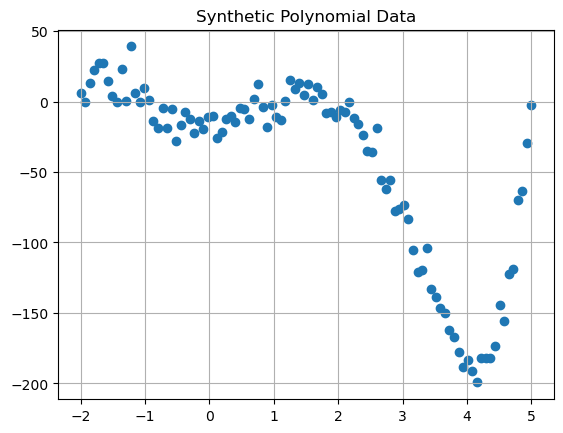

In [71]:
plt.scatter(X,y)
plt.title('Synthetic Polynomial Data')
plt.grid()

### Problem 1

#### Polynomial Features and Linear Regression Pipeline

To begin, you are to construct a `Pipeline` object with the following steps:

- A  `poly_features` generated using `PolynomialFeatures()`with `degree = 5` polynomial features and `include_bias = False`.
- A `linreg` step generated using `LinearRegression()` with default values.

Assign this pipeline to `ols_pipe`.

Next, use the `fit` function to train your model on `X` and `y`.

Finally, use the `predict` function to calculate your predicitons of `X`, Assign your result to `ols_preds` below.

In [73]:
ols_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 5, include_bias = False)),
                      ('linreg', LinearRegression())])

In [74]:
ols_pipe.fit(X,y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linreg', LinearRegression())])

In [75]:
ols_preds = ols_pipe.predict(X)


In [76]:
ols_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linreg', LinearRegression())])

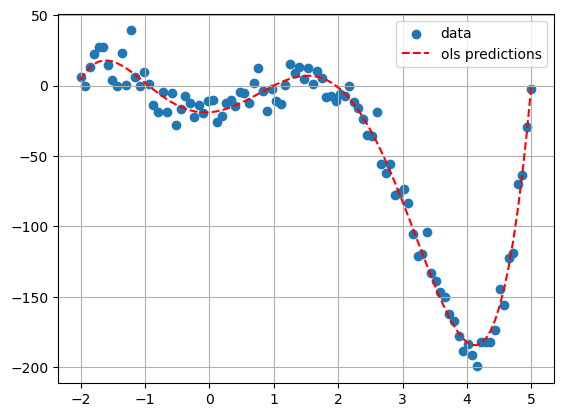

In [77]:
# Uncomment to visualize solutions
Xnp = X.to_numpy()
plt.scatter(Xnp, y, label = 'data')
plt.plot(Xnp, ols_preds, 'r--', label = 'ols predictions')
plt.legend()
plt.grid();

In [78]:
X.head()

,x
0,-2.000000
1,-1.929293
2,-1.858586
3,-1.787879
4,-1.717172


In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [79]:
poly = PolynomialFeatures(degree = 5, include_bias = False)

In [82]:
X_poly = poly.fit_transform(X)

In [83]:
lin = LinearRegression()

In [84]:
lin.fit(X_poly, y)

LinearRegression()

In [85]:
lin.predict(X_poly)

array([ 3.89968983e+00,  8.94699542e+00,  1.27107523e+01,  1.53359753e+01,
        1.69591341e+01,  1.77083651e+01,  1.77036836e+01,  1.70571948e+01,
        1.58733060e+01,  1.42489382e+01,  1.22737382e+01,  1.00302895e+01,
        7.59432511e+00,  5.03493846e+00,  2.41479553e+00, -2.09653477e-01,
       -2.78796240e+00, -5.27547739e+00, -7.63312514e+00, -9.82720116e+00,
       -1.18291580e+01, -1.36153936e+01, -1.51670394e+01, -1.64697487e+01,
       -1.75134849e+01, -1.82923098e+01, -1.88041717e+01, -1.90506937e+01,
       -1.90369623e+01, -1.87713151e+01, -1.82651294e+01, -1.75326104e+01,
       -1.65905795e+01, -1.54582623e+01, -1.41570773e+01, -1.27104237e+01,
       -1.11434699e+01, -9.48294197e+00, -7.75691129e+00, -5.99458336e+00,
       -4.22608585e+00, -2.48225685e+00, -7.94433165e-01,  8.05761454e-01,
        2.28662804e+00,  3.61660417e+00,  4.76447568e+00,  5.69958845e+00,
        6.39206010e+00,  6.81299177e+00,  6.93467987e+00,  6.73082777e+00,
        6.17675762e+00,  

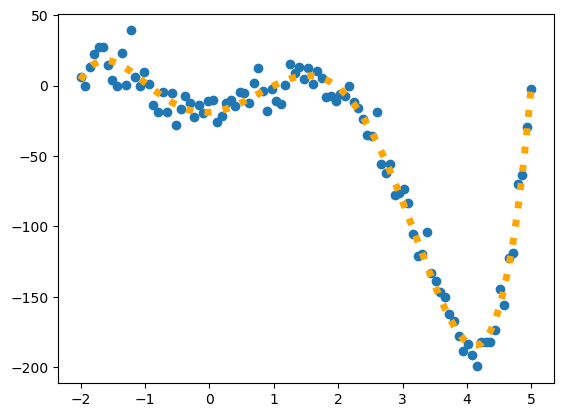

In [90]:
#plt.plot(range(0,100),lin.predict(X_poly))
plt.scatter(X, y)
plt.plot(X, lin.predict(X_poly), linestyle=":", color="orange", linewidth = 5)

### Problem 2

#### Ridge model with small regularization penalty

To begin, you are to construct a `Pipeline` object with the following steps:

- A  `poly_features` generated using `PolynomialFeatures()`with `degree = 5` polynomial features and `include_bias = False`.
- A `ridge_low` step generated using `Ridge()` with `alpha = 0.1`.

Assign this pipeline to `ridge_low_pipe`.

Next, use the `fit` function to train your model on `X` and `y`.

Finally, use the `predict` function to calculate your predicitons of `X`, Assign your result to `ridge_low_preds` below. 

In [91]:
ridge_low_pipe = Pipeline([('poly_features',PolynomialFeatures(degree = 5, include_bias = False)),
                          ('ridge_low', Ridge(alpha = 0.1))])

In [92]:
ridge_low_pipe.fit(X,y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_low', Ridge(alpha=0.1))])

In [93]:
ridge_low_preds = ridge_low_pipe.predict(X)

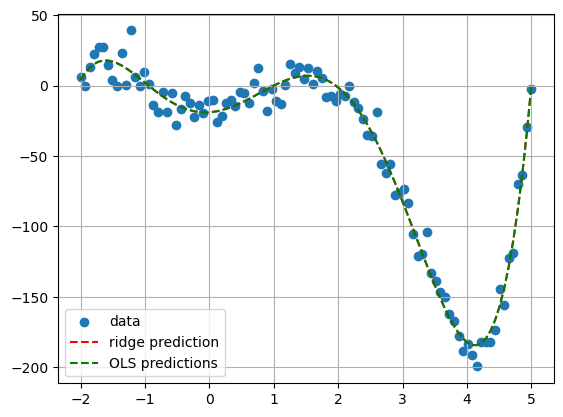

In [99]:
Xnp = X.to_numpy()
plt.scatter(Xnp,y,label = 'data')
plt.plot(Xnp, ridge_low_preds, 'r--', label = 'ridge prediction')
plt.plot(Xnp, ols_preds, '--g', label = 'OLS predictions')
plt.legend()
plt.grid()

### Problem 3

#### High Regularization Ridge 

To begin, you are to construct a `Pipeline` object with the following steps:

- A  `poly_features` generated using `PolynomialFeatures()`with `degree = 5` polynomial features and `include_bias = False`.
- A `ridge_high` step generated using `Ridge()` with `alpha = 1000`.

Assign this pipeline to `ridge_high_pipe`.

Next, use the `fit` function to train your model on `X` and `y`.

Finally, use the `predict` function to calculate your predicitons of `X`, Assign your result to `ridge_high_preds` below. 

In [100]:
ridge_high_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 5, include_bias = False)),
                            ('ridge_high', Ridge(alpha = 1000))])

In [101]:
ridge_high_pipe.fit(X,y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_high', Ridge(alpha=1000))])

In [102]:
ridge_high_preds = ridge_high_pipe.predict(X)

In [103]:
ridge_high_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_high', Ridge(alpha=1000))])

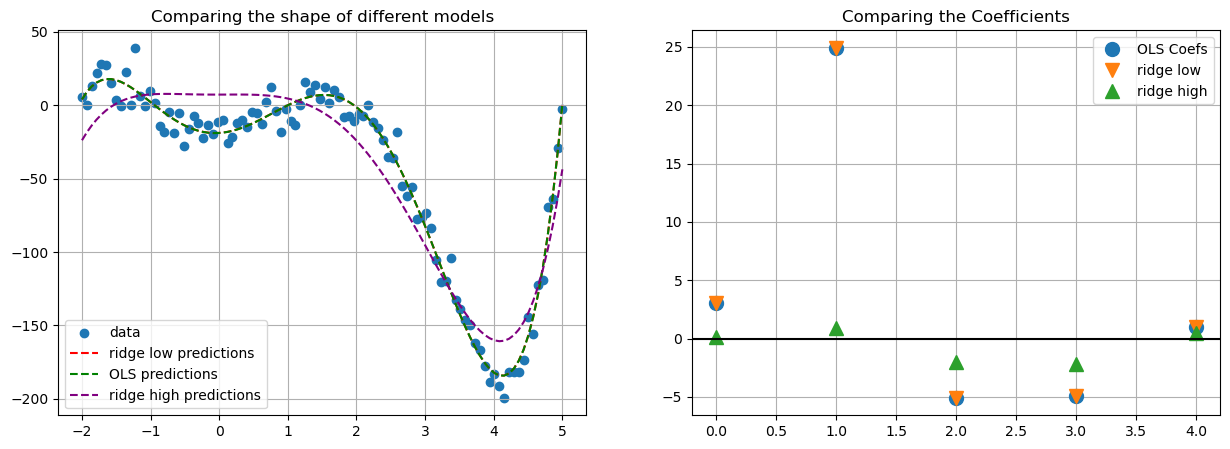

In [104]:
## Uncomment to visualize solutions
Xnp = X.to_numpy()
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(Xnp, y, label = 'data')
ax[0].plot(Xnp, ridge_low_preds, '--r', label = 'ridge low predictions')
ax[0].plot(Xnp, ols_preds, '--g', label = 'OLS predictions')
ax[0].plot(Xnp, ridge_high_preds, '--', color = 'purple', label = 'ridge high predictions')
ax[0].set_title('Comparing the shape of different models')
ax[0].legend();
ax[0].grid();
ax[1].plot(ols_pipe.named_steps['linreg'].coef_, 'o', markersize = 10, label = 'OLS Coefs')
ax[1].plot(ridge_low_pipe.named_steps['ridge_low'].coef_, 'v', markersize = 10, label = 'ridge low')
ax[1].plot(ridge_high_pipe.named_steps['ridge_high'].coef_, '^', markersize = 10, label = 'ridge high')
ax[1].legend();
ax[1].axhline(color = 'black')
ax[1].grid();
ax[1].set_title('Comparing the Coefficients');